In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
try:    
    from google.colab import drive
    drive.mount('/content/drive/', force_remount= True)
    %cd '/content/drive/MyDrive/uni-mannheim/data Mining II/DMC'
except ImportError as e:
    print("error")
    pass

Mounted at /content/drive/
/content/drive/MyDrive/uni-mannheim/data Mining II/DMC


In [3]:
items_df = pd.read_csv('items.csv', sep='|')
orders_df = pd.read_csv('orders.csv', sep='|')
cat_hierarchy_df = pd.read_csv('category_hierarchy.csv', sep='|')
submission_df = pd.read_csv('submission.csv', sep='|')
orders_before_dec_df = pd.read_csv('data/orders_before_dec.csv', sep='|')
orders_before_jan_df = pd.read_csv('data/orders_before_jan.csv', sep='|')
submission_before_dec_df = pd.read_csv('data/submission_dec.csv', sep='|')
submission_before_jan_df = pd.read_csv('data/submission_jan.csv', sep='|')

In [9]:
orders_before_jan_df.head() # june to end of december
orders_before_jan_df.sort_values(by=['date'], ascending=True)
order_items = orders_before_jan_df.merge(items_df);

In [6]:
display(order_items)

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
1,2020-06-01,23570,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
2,2020-06-01,23495,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
3,2020-06-01,26073,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
4,2020-06-01,34302,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
...,...,...,...,...,...,...,...,...,...,...,...
905876,2020-12-31,39707,28203,1,167,4,1,432,-1,159,"[3900, 3901, 3902, 3903]"
905877,2020-12-31,16612,8146,1,1144,4,1,102,3,144,"[3745, 1849]"
905878,2020-12-31,12133,8614,2,37,10,2,536,0,19,NaN
905879,2020-12-31,25473,13818,1,430,4,1,196,3,166,NaN


In [7]:
order_items_preiction = orders_before_dec_df.merge(items_df);
order_items_preiction

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
1,2020-06-01,23570,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
2,2020-06-01,23495,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
3,2020-06-01,26073,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
4,2020-06-01,34302,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
...,...,...,...,...,...,...,...,...,...,...,...
767126,2020-11-30,19742,28822,2,1156,6,2,495,0,146,NaN
767127,2020-11-30,15769,26453,2,791,10,3,502,0,152,"[2459, 2833, 3916]"
767128,2020-11-30,16023,20609,1,768,10,1,154,0,61,NaN
767129,2020-11-30,43601,23190,2,1275,10,2,515,0,92,"[1176, 732, 17, 3240, 2207, 536, 115]"


In [10]:
# format date
order_items['date'] = pd.to_datetime(order_items['date'], format='%Y-%m-%d');order_items

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,2020-06-01,38769,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
1,2020-06-01,23570,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
2,2020-06-01,23495,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
3,2020-06-01,26073,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
4,2020-06-01,34302,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
...,...,...,...,...,...,...,...,...,...,...,...
905876,2020-12-31,39707,28203,1,167,4,1,432,-1,159,"[3900, 3901, 3902, 3903]"
905877,2020-12-31,16612,8146,1,1144,4,1,102,3,144,"[3745, 1849]"
905878,2020-12-31,12133,8614,2,37,10,2,536,0,19,NaN
905879,2020-12-31,25473,13818,1,430,4,1,196,3,166,NaN


In [45]:
#training_data = order_items[(order_items['date'] <= '2020-11-15')] #  me
training_data = order_items[(order_items['date'] <= '2020-11-01')] #ole
#X_test = order_items[(order_items['date'] >= '2020-11-16') & (order_items['date'] <= '2020-12-27')] # me
X_test = order_items[(order_items['date'] >= '2020-12-01') & (order_items['date'] <= '2020-12-31')] # ole
orders_df['date'] = pd.to_datetime(orders_df['date'], format='%Y-%m-%d')
display(X_test)

,date,userID,itemID,order,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
401,2020-12-01,26709,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
402,2020-12-01,8685,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
403,2020-12-01,33530,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
404,2020-12-02,2692,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
405,2020-12-02,44970,3477,1,186,6,0,196,0,45,"[74, 4109, 3867, 803, 4053]"
...,...,...,...,...,...,...,...,...,...,...,...
905876,2020-12-31,39707,28203,1,167,4,1,432,-1,159,"[3900, 3901, 3902, 3903]"
905877,2020-12-31,16612,8146,1,1144,4,1,102,3,144,"[3745, 1849]"
905878,2020-12-31,12133,8614,2,37,10,2,536,0,19,NaN
905879,2020-12-31,25473,13818,1,430,4,1,196,3,166,NaN


In [43]:
tx_user = pd.DataFrame(training_data['userID'].unique())
tx_user.columns = ['userID']
tx_user

#create a dataframe with customer id and first purchase date in tx_next
tx_min_purchase = training_data.groupby('userID').date.min().reset_index()
tx_min_purchase.columns = ['userID','MinPurchaseDate']

## For Recency

tx_max_purchase = training_data.groupby('userID').date.max().reset_index()
tx_max_purchase.columns = ['userID','MaxPurchaseDate']

#merge two dataframes
tx_purchase_dates = pd.merge(tx_max_purchase,tx_min_purchase,on='userID',how='left')

#calculate the time difference in days:
tx_purchase_dates['NextPurchaseDay'] = (tx_purchase_dates['MaxPurchaseDate'] - tx_purchase_dates['MinPurchaseDate']).dt.days
#display(tx_purchase_dates)


tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_user = pd.merge(tx_user, tx_max_purchase[['userID','Recency']], on='userID')


## For Frequency
tx_frequency = training_data.groupby('userID').date.count().reset_index()
tx_frequency.columns = ['userID','Frequency']


tx_user = pd.merge(tx_user, tx_frequency, on='userID')
tx_user = pd.merge(tx_user, tx_purchase_dates, on='userID')
print("Frequency and Recency")
display(tx_user)


def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

#Clustering Recency, Frequency, and Monetary Value:

#clustering for Recency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)


#clustering for Frequency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

print("Clustering of Frequency and Recency") 

display(tx_user)

#We will include new columns “OverallScore” and “Segment

#building overall segmentation
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster']

# Get mean of the components of OverallScore
#chhose best customer
tx_user.groupby('OverallScore')['Recency', 'Frequency'].mean()
display(tx_user)
#assign segment names, numbers are taking from mean above
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value'


#display(tx_user)


tx_user['NextPurchaseDayRange'] = 1  ## 7
tx_user.loc[tx_user.NextPurchaseDay>7,'NextPurchaseDayRange'] = 2 ## 2 weeks
tx_user.loc[tx_user.NextPurchaseDay>14,'NextPurchaseDayRange'] = 3 ## 3 weeks
tx_user.loc[tx_user.NextPurchaseDay>21,'NextPurchaseDayRange'] = 4 # 4 weekds


#display(tx_user)

tx_user = tx_user.drop(columns=['MaxPurchaseDate', 'MinPurchaseDate'])
print("NextPurchaseDayRange") 


Frequency and Recency


,userID,Recency,Frequency,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,38769,10,49,2020-10-22,2020-06-01,143
1,23570,73,15,2020-08-20,2020-06-01,80
2,23495,7,35,2020-10-25,2020-06-01,146
3,26073,28,13,2020-10-04,2020-06-01,125
4,34302,1,14,2020-10-31,2020-06-01,152
...,...,...,...,...,...,...
45336,42776,18,1,2020-10-14,2020-10-14,0
45337,33172,9,1,2020-10-23,2020-10-23,0
45338,3026,4,3,2020-10-28,2020-10-28,0
45339,37070,4,1,2020-10-28,2020-10-28,0


Clustering of Frequency and Recency


,userID,Recency,Frequency,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,RecencyCluster,FrequencyCluster
0,38769,10,49,2020-10-22,2020-06-01,143,3,3
1,44949,14,38,2020-10-18,2020-06-03,137,3,3
2,30272,18,43,2020-10-14,2020-06-08,128,3,3
3,39855,4,37,2020-10-28,2020-06-13,137,3,3
4,34355,8,58,2020-10-24,2020-06-06,140,3,3
...,...,...,...,...,...,...,...,...
45336,31015,113,1,2020-07-11,2020-07-11,0,0,0
45337,4833,113,1,2020-07-11,2020-07-11,0,0,0
45338,36908,102,1,2020-07-22,2020-07-22,0,0,0
45339,19752,106,1,2020-07-18,2020-07-18,0,0,0


,userID,Recency,Frequency,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,RecencyCluster,FrequencyCluster,OverallScore
0,38769,10,49,2020-10-22,2020-06-01,143,3,3,6
1,44949,14,38,2020-10-18,2020-06-03,137,3,3,6
2,30272,18,43,2020-10-14,2020-06-08,128,3,3,6
3,39855,4,37,2020-10-28,2020-06-13,137,3,3,6
4,34355,8,58,2020-10-24,2020-06-06,140,3,3,6
...,...,...,...,...,...,...,...,...,...
45336,31015,113,1,2020-07-11,2020-07-11,0,0,0,0
45337,4833,113,1,2020-07-11,2020-07-11,0,0,0,0
45338,36908,102,1,2020-07-22,2020-07-22,0,0,0,0
45339,19752,106,1,2020-07-18,2020-07-18,0,0,0,0


NextPurchaseDayRange


In [48]:

one_hot = pd.get_dummies(tx_user['Segment'])
# Drop column B as it is now encoded
tx_user = tx_user.drop('Segment',axis = 1)
# Join the encoded df
tx_user = tx_user.join(one_hot)

In [26]:
# Get mean of the components of OverallScore
tx_user.groupby('OverallScore')['Recency', 'Frequency'].mean()

,Recency,Frequency
OverallScore,,
0,118.263039,4.066515
1,72.886442,5.876339
2,43.379987,8.053015
3,22.240552,10.571070
4,13.519362,17.083582
5,10.456726,27.756597
6,8.227273,46.730114


In [29]:
display(tx_user.tail(10))

,userID,Recency,Frequency,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,RecencyCluster,FrequencyCluster,OverallScore,NextPurchaseDayRange,High-Value,Low-Value,Mid-Value
45331,4768,117,1,2020-07-07,2020-07-07,0,0,0,0,1,0,1,0
45332,24272,116,1,2020-07-08,2020-07-08,0,0,0,0,1,0,1,0
45333,24368,116,1,2020-07-08,2020-07-08,0,0,0,0,1,0,1,0
45334,21110,114,1,2020-07-10,2020-07-10,0,0,0,0,1,0,1,0
45335,46018,113,1,2020-07-11,2020-07-11,0,0,0,0,1,0,1,0
45336,31015,113,1,2020-07-11,2020-07-11,0,0,0,0,1,0,1,0
45337,4833,113,1,2020-07-11,2020-07-11,0,0,0,0,1,0,1,0
45338,36908,102,1,2020-07-22,2020-07-22,0,0,0,0,1,0,1,0
45339,19752,106,1,2020-07-18,2020-07-18,0,0,0,0,1,0,1,0
45340,31452,103,1,2020-07-21,2020-07-21,0,0,0,0,1,0,1,0


In [30]:
# Calculating correlation matrix
corr_matrix = tx_user[tx_user.columns].corr()

# Create a dataframe for the minimum correlation coefficient values
corr_df = pd.DataFrame(corr_matrix.min())

# Rename the column label of corr_df
corr_df.columns = ['MinCorrelationCoeff']

# Calculate the maximum correlation coefficient value apart less than 1.
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

,MinCorrelationCoeff,MaxCorrelationCoeff
userID,-0.003186,0.002512
Recency,-0.950987,0.749247
Frequency,-0.513154,0.919506
NextPurchaseDay,-0.724092,0.751191
RecencyCluster,-0.950987,0.848105
FrequencyCluster,-0.565380,0.919506
OverallScore,-0.821541,0.848105
NextPurchaseDayRange,-0.504938,0.702121
High-Value,-0.453382,0.749306
Low-Value,-0.821541,0.749247


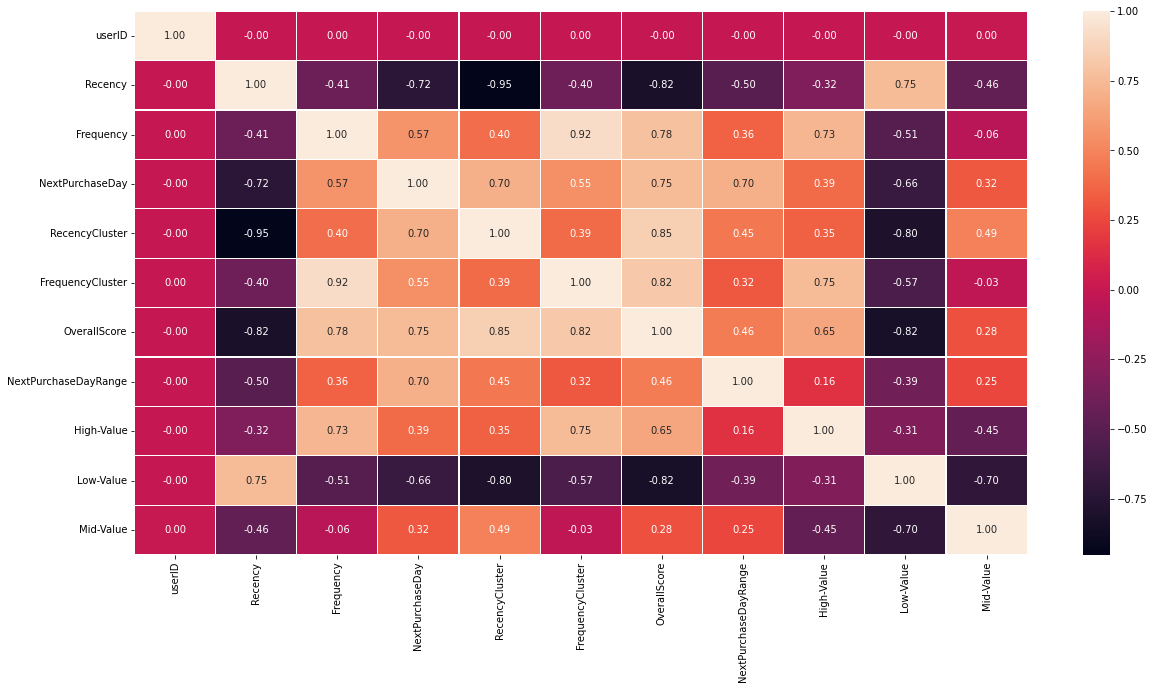

In [33]:
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, 
            fmt=".2f");

In [46]:
# test

tx_user_test = pd.DataFrame(X_test['userID'].unique())
tx_user_test.columns = ['userID']
tx_user

#create a dataframe with customer id and first purchase date in tx_next
tx_min_purchase = X_test.groupby('userID').date.min().reset_index()
tx_min_purchase.columns = ['userID','MinPurchaseDate']

## For Recency

tx_max_purchase = X_test.groupby('userID').date.max().reset_index()
tx_max_purchase.columns = ['userID','MaxPurchaseDate']

#merge two dataframes
tx_purchase_dates = pd.merge(tx_max_purchase,tx_min_purchase,on='userID',how='left')

#calculate the time difference in days:
tx_purchase_dates['NextPurchaseDay'] = (tx_purchase_dates['MaxPurchaseDate'] - tx_purchase_dates['MinPurchaseDate']).dt.days
#display(tx_purchase_dates)


tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_user_test = pd.merge(tx_user_test, tx_max_purchase[['userID','Recency']], on='userID')


## For Frequency
tx_frequency = X_test.groupby('userID').date.count().reset_index()
tx_frequency.columns = ['userID','Frequency']


tx_user_test = pd.merge(tx_user_test, tx_frequency, on='userID')
tx_user_test = pd.merge(tx_user_test, tx_purchase_dates, on='userID')
print("Frequency and Recency")
display(tx_user_test)


def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

#Clustering Recency, Frequency, and Monetary Value:

#clustering for Recency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user_test[['Recency']])
tx_user_test['RecencyCluster'] = kmeans.predict(tx_user_test[['Recency']])

tx_user_test = order_cluster('RecencyCluster', 'Recency',tx_user_test,False)


#clustering for Frequency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user_test[['Frequency']])
tx_user_test['FrequencyCluster'] = kmeans.predict(tx_user_test[['Frequency']])

tx_user_test = order_cluster('FrequencyCluster', 'Frequency',tx_user_test,True)

print("Clustering of Frequency and Recency") 

display(tx_user_test)

#We will include new columns “OverallScore” and “Segment

#building overall segmentation
tx_user_test['OverallScore'] = tx_user_test['RecencyCluster'] + tx_user_test['FrequencyCluster']
#chhose best customer
tx_user_test.groupby('OverallScore')['Recency', 'Frequency'].mean()
display(tx_user_test)

#assign segment names
tx_user_test['Segment'] = 'Low-Value'
tx_user_test.loc[tx_user_test['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user_test.loc[tx_user_test['OverallScore']>4,'Segment'] = 'High-Value'


#display(tx_user)


tx_user_test['NextPurchaseDayRange'] = 1  ## 7-> custoemr will buy something within 7 days
tx_user_test.loc[tx_user_test.NextPurchaseDay>7,'NextPurchaseDayRange'] = 2 ## customer will by smth. within 2 weeks
tx_user_test.loc[tx_user_test.NextPurchaseDay>14,'NextPurchaseDayRange'] = 3 ## customer will by smth. within 3 weeks
tx_user_test.loc[tx_user_test.NextPurchaseDay>21,'NextPurchaseDayRange'] = 4 # customer will by smth. within 4 weekds


#display(tx_user)

tx_user_test = tx_user_test.drop(columns=['MaxPurchaseDate', 'MinPurchaseDate'])
#print("NextPurchaseDayRange") 

# one hote encoding
one_hot = pd.get_dummies(tx_user_test['Segment'])
# Drop column B as it is now encoded
tx_user_test = tx_user_test.drop('Segment',axis = 1)
# Join the encoded df
tx_user_test = tx_user_test.join(one_hot)

display(tx_user_test)

Frequency and Recency


,userID,Recency,Frequency,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,26709,3,10,2020-12-28,2020-12-01,27
1,8685,10,6,2020-12-21,2020-12-01,20
2,33530,17,10,2020-12-14,2020-12-01,13
3,2692,29,2,2020-12-02,2020-12-02,0
4,44970,19,7,2020-12-12,2020-12-02,10
...,...,...,...,...,...,...
30359,15557,2,1,2020-12-29,2020-12-29,0
30360,38046,2,1,2020-12-29,2020-12-29,0
30361,32239,1,1,2020-12-30,2020-12-30,0
30362,25102,1,1,2020-12-30,2020-12-30,0


Clustering of Frequency and Recency


,userID,Recency,Frequency,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,RecencyCluster,FrequencyCluster
0,26709,3,10,2020-12-28,2020-12-01,27,3,2
1,35046,4,10,2020-12-27,2020-12-03,24,3,2
2,15509,3,11,2020-12-28,2020-12-07,21,3,2
3,39536,2,11,2020-12-29,2020-12-01,28,3,2
4,39420,2,11,2020-12-29,2020-12-08,21,3,2
...,...,...,...,...,...,...,...,...
30359,24094,23,1,2020-12-08,2020-12-08,0,0,0
30360,28496,23,1,2020-12-08,2020-12-08,0,0,0
30361,5121,22,1,2020-12-09,2020-12-09,0,0,0
30362,31027,22,1,2020-12-09,2020-12-09,0,0,0


,userID,Recency,Frequency,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay,RecencyCluster,FrequencyCluster,OverallScore
0,26709,3,10,2020-12-28,2020-12-01,27,3,2,5
1,35046,4,10,2020-12-27,2020-12-03,24,3,2,5
2,15509,3,11,2020-12-28,2020-12-07,21,3,2,5
3,39536,2,11,2020-12-29,2020-12-01,28,3,2,5
4,39420,2,11,2020-12-29,2020-12-08,21,3,2,5
...,...,...,...,...,...,...,...,...,...
30359,24094,23,1,2020-12-08,2020-12-08,0,0,0,0
30360,28496,23,1,2020-12-08,2020-12-08,0,0,0,0
30361,5121,22,1,2020-12-09,2020-12-09,0,0,0,0
30362,31027,22,1,2020-12-09,2020-12-09,0,0,0,0


,userID,Recency,Frequency,NextPurchaseDay,RecencyCluster,FrequencyCluster,OverallScore,NextPurchaseDayRange,High-Value,Low-Value,Mid-Value
0,26709,3,10,27,3,2,5,4,1,0,0
1,35046,4,10,24,3,2,5,4,1,0,0
2,15509,3,11,21,3,2,5,3,1,0,0
3,39536,2,11,28,3,2,5,4,1,0,0
4,39420,2,11,21,3,2,5,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30359,24094,23,1,0,0,0,0,1,0,1,0
30360,28496,23,1,0,0,0,0,1,0,1,0
30361,5121,22,1,0,0,0,0,1,0,1,0
30362,31027,22,1,0,0,0,0,1,0,1,0


In [34]:
!pip install xgboost

In [49]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
#train & test split

tx_class = tx_user.drop('NextPurchaseDay',axis=1)
X_test, y_test = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class.NextPurchaseDayRange

tx_class = tx_user.drop('NextPurchaseDay',axis=1)
X_train, y_train = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class.NextPurchaseDayRange


xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

result = xgb_model.score(X_test, y_test)
print(result)


print('Accuracy of XGB classifier on training set: {:.2f}'
      .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
      .format(xgb_model.score(X_test[X_train.columns], y_test)))

0.9288282128757637
Accuracy of XGB classifier on training set: 0.93
Accuracy of XGB classifier on test set: 0.93


In [55]:
df = pd.DataFrame(y_train)
df.NextPurchaseDayRange.value_counts()

4    41427
1     3131
3      537
2      457
Name: NextPurchaseDayRange, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
#train & test split

tx_class = tx_user.drop('NextPurchaseDay',axis=1)
X_test, y_test = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class.NextPurchaseDayRange

tx_class = tx_user.drop('NextPurchaseDay',axis=1)
X_train, y_train = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class.NextPurchaseDayRange


xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

result = xgb_model.score(X_test, y_test)
print(result)


print('Accuracy of XGB classifier on training set: {:.2f}'
      .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
      .format(xgb_model.score(X_test[X_train.columns], y_test)))

0.9288282128757637
Accuracy of XGB classifier on training set: 0.93
Accuracy of XGB classifier on test set: 0.93


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

LR [0.99572141 0.73418615]
NB [0.99572141 0.69691222]
RF [0.99572141 0.78425232]
SVC [0.99572141 0.77419497]
Dtree [0.98619382 0.77265108]
XGB [0.99580962 0.78981032]
KNN [0.98570861 0.77419497]
